<a href="https://colab.research.google.com/github/NazmulHassan033/Nazmul-Hassan/blob/main/Pd_data_Boruta_feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bourta feature selection

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
# Step 1: Data Loading
data = pd.read_csv("parkinsons.csv")
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix

# Assuming 'data' is a pandas DataFrame
X = data.drop(['name','status'], axis=1)  # Assuming "status" column contains labels
y = data['status']




In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor



# Make X_shadow by randomly permuting each column of X
np.random.seed(42)
X_shadow = X.apply(np.random.permutation)
X_shadow.columns = ['shadow_' + feat for feat in X.columns]

# Make X_boruta by appending X_shadow to X
X_boruta = pd.concat([X, X_shadow], axis=1)


In [ ]:
# Fit a random forest (suggested max_depth between 3 and 7)
forest = RandomForestRegressor(max_depth=5, random_state=42)
forest.fit(X_boruta, y)

# Store feature importances
feat_imp_X = forest.feature_importances_[:len(X.columns)]
feat_imp_shadow = forest.feature_importances_[len(X.columns):]

# Compute hits
hits = feat_imp_X > feat_imp_shadow.max()


# Make X_boruta by appending X_shadow to X
X_boruta = pd.concat([X, X_shadow], axis=1)

In [ ]:


# Create a new dataframe with X_boruta and feature importances
X_boruta_with_importances = pd.concat([X_boruta, pd.Series(feat_imp_X, name='Feature_Importance')], axis=1)

# Print X_boruta_with_importances
print(X_boruta_with_importances)


# Print X_boruta with feature importances
X_boruta_with_importances = X_boruta.copy()
#X_boruta_with_importances['Feature_Importance'] = np.concatenate([feat_imp_X, feat_imp_shadow])
#X_boruta_with_importances['Hit'] = np.concatenate([hits, np.full(len(feat_imp_shadow), False)])



     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
### initialize hits counter
hits = np.zeros((len(X.columns)))
### repeat 20 times
for iter_ in range(20):
   ### make X_shadow by randomly permuting each column of X
   np.random.seed(iter_)
   X_shadow = X.apply(np.random.permutation)
   X_boruta = pd.concat([X, X_shadow], axis = 1)
   ### fit a random forest (suggested max_depth between 3 and 7)
   forest = RandomForestRegressor(max_depth = 5, random_state = 42)
   forest.fit(X_boruta, y)
   ### store feature importance
   feat_imp_X = forest.feature_importances_[:len(X.columns)]
   feat_imp_shadow = forest.feature_importances_[len(X.columns):]
   ### compute hits for this trial and add to counter
   hits += (feat_imp_X > feat_imp_shadow.max())

#Boruta Features

In [ ]:
boruta_features = X.columns[hits > (iter_ / 2)]
print("Boruta-selected features:")
print(boruta_features)


Boruta-selected features:
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'HNR', 'RPDE', 'spread1', 'spread2',
       'PPE'],
      dtype='object')


# Dataset with reduced features

In [ ]:
# Assuming you have a list of selected features and their rankings
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'HNR', 'RPDE', 'spread1', 'spread2', 'PPE','status']
#selected_features = ['MDVP:Fo(Hz)','MDVP:Flo(Hz)','spread1','spread2']

# Set a threshold for feature selection
threshold = 2
reduced_dataset = data[selected_features]

#Now Apply SMOTE on reduced dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the base estimator (Decision Tree Classifier) for SMOTEBoost
base_estimator = DecisionTreeClassifier(random_state=42)


In [ ]:
from collections import Counter

import numpy as np
from sklearn.base import is_regressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble._forest import BaseForest
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from sklearn.tree import BaseDecisionTree
from sklearn.utils import check_random_state
from sklearn.utils import check_X_y
#from sklearn.utils import shuffle


class SMOTE(object):
    """Implementation of Synthetic Minority Over-Sampling Technique (SMOTE).

    SMOTE performs oversampling of the minority class by picking target
    minority class samples and their nearest minority class neighbors and
    generating new samples that linearly combine features of each target
    sample with features of its selected minority class neighbors [1].

    Parameters
    ----------
    k_neighbors : int, optional (default=5)
        Number of nearest neighbors.

    random_state : int or None, optional (default=None)
        If int, random_state is the seed used by the random number generator.
        If None, the random number generator is the RandomState instance used
        by np.random.

    References
    ----------
    .. [1] N. V. Chawla, K. W. Bowyer, L. O. Hall, and P. Kegelmeyer. "SMOTE:
           Synthetic Minority Over-Sampling Technique." Journal of Artificial
           Intelligence Research (JAIR), 2002.
    """

    def __init__(self, k_neighbors=5, random_state=None):
        self.k = k_neighbors
        self.random_state = random_state

    def sample(self, n_samples):
        """Generate samples.

        Parameters
        ----------
        n_samples : int
            Number of new synthetic samples.

        Returns
        -------
        S : array, shape = [n_samples, n_features]
            Returns synthetic samples.
        """
        np.random.seed(seed=self.random_state)

        S = np.zeros(shape=(n_samples, self.n_features))
        # Calculate synthetic samples.
        for i in range(n_samples):
            j = np.random.randint(0, self.X.shape[0])

            # Find the NN for each sample.
            # Exclude the sample itself.
            nn = self.neigh.kneighbors(
                self.X[j].reshape(1, -1), return_distance=False
            )[:, 1:]
            nn_index = np.random.choice(nn[0])

            dif = self.X[nn_index] - self.X[j]
            gap = np.random.random()

            S[i, :] = self.X[j, :] + gap * dif[:]

        return S

    def fit(self, X):
        """Train model based on input data.

        Parameters
        ----------
        X : array-like, shape = [n_minority_samples, n_features]
            Holds the minority samples.
        """
        self.X = X
        self.n_minority_samples, self.n_features = self.X.shape

        # Learn nearest neighbors.
        self.neigh = NearestNeighbors(n_neighbors=self.k + 1)
        self.neigh.fit(self.X)

        return self


class SMOTEBoost(AdaBoostClassifier):
    """Implementation of SMOTEBoost.

    SMOTEBoost introduces data sampling into the AdaBoost algorithm by
    oversampling the minority class using SMOTE on each boosting iteration [1].

    This implementation inherits methods from the scikit-learn
    AdaBoostClassifier class, only modifying the `fit` method.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        Number of new synthetic samples per boosting step.

    k_neighbors : int, optional (default=5)
        Number of nearest neighbors.

    base_estimator : object, optional (default=DecisionTreeClassifier)
        The base estimator from which the boosted ensemble is built.
        Support for sample weighting is required, as well as proper `classes_`
        and `n_classes_` attributes.

    n_estimators : int, optional (default=50)
        The maximum number of estimators at which boosting is terminated.
        In case of perfect fit, the learning procedure is stopped early.

    learning_rate : float, optional (default=1.)
        Learning rate shrinks the contribution of each classifier by
        ``learning_rate``. There is a trade-off between ``learning_rate`` and
        ``n_estimators``.

    algorithm : {'SAMME', 'SAMME.R'}, optional (default='SAMME.R')
        If 'SAMME.R' then use the SAMME.R real boosting algorithm.
        ``base_estimator`` must support calculation of class probabilities.
        If 'SAMME' then use the SAMME discrete boosting algorithm.
        The SAMME.R algorithm typically converges faster than SAMME,
        achieving a lower test error with fewer boosting iterations.

    random_state : int or None, optional (default=None)
        If int, random_state is the seed used by the random number generator.
        If None, the random number generator is the RandomState instance used
        by np.random.

    References
    ----------
    .. [1] N. V. Chawla, A. Lazarevic, L. O. Hall, and K. W. Bowyer.
           "SMOTEBoost: Improving Prediction of the Minority Class in
           Boosting." European Conference on Principles of Data Mining and
           Knowledge Discovery (PKDD), 2003.
    """

    def __init__(
        self,
        n_samples=100,
        k_neighbors=5,
        base_estimator=None,
        n_estimators=50,
        learning_rate=1.,
        algorithm="SAMME.R",
        random_state=None,
    ):

        self.n_samples = n_samples
        self.algorithm = algorithm
        self.k_neighbors = k_neighbors
        self.smote = SMOTE(k_neighbors=k_neighbors, random_state=random_state)

        super(SMOTEBoost, self).__init__(
            base_estimator=base_estimator,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=random_state,
        )

    def fit(self, X, y, sample_weight=None, minority_target=None):
        """Build a boosted classifier/regressor from the training set (X, y),
        performing SMOTE during each boosting step.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape = [n_samples, n_features]
            The training input samples. Sparse matrix can be CSC, CSR, COO,
            DOK, or LIL. COO, DOK, and LIL are converted to CSR. The dtype is
            forced to DTYPE from tree._tree if the base classifier of this
            ensemble weighted boosting classifier is a tree or forest.

        y : array-like of shape = [n_samples]
            The target values (class labels in classification, real numbers in
            regression).

        sample_weight : array-like of shape = [n_samples], optional
            Sample weights. If None, the sample weights are initialized to
            1 / n_samples.

        minority_target : int
            Minority class label.

        Returns
        -------
        self : object
            Returns self.

        Notes
        -----
        Based on the scikit-learn v0.18 AdaBoostClassifier and
        BaseWeightBoosting `fit` methods.
        """
        # Check that algorithm is supported.
        if self.algorithm not in ("SAMME", "SAMME.R"):
            raise ValueError("algorithm %s is not supported" % self.algorithm)

        # Check parameters.
        if self.learning_rate <= 0:
            raise ValueError("learning_rate must be greater than zero")

        if (self.base_estimator is None or isinstance(
            self.base_estimator, (BaseDecisionTree, BaseForest)
        )):
            DTYPE = np.float64  # from fast_dict.pxd
            dtype = DTYPE
            accept_sparse = "csc"
        else:
            dtype = None
            accept_sparse = ["csr", "csc"]

        X, y = check_X_y(
            X,
            y,
            accept_sparse=accept_sparse,
            dtype=dtype,
            y_numeric=is_regressor(self),
        )

        if sample_weight is None:
            # Initialize weights to 1 / n_samples.
            sample_weight = np.empty(X.shape[0], dtype=np.float64)
            sample_weight[:] = 1. / X.shape[0]
        else:
            sample_weight = check_array(sample_weight, ensure_2d=False)
            # Normalize existing weights.
            sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

            # Check that the sample weights sum is positive.
            if sample_weight.sum() <= 0:
                raise ValueError(
                    "Attempting to fit with a non-positive "
                    "weighted number of samples."
                )

        if minority_target is None:
            # Determine the minority class label.
            stats_c_ = Counter(y)
            min_c_ = min(stats_c_, key=stats_c_.get)
            self.minority_target = min_c_
        else:
            self.minority_target = minority_target

        # Check parameters.
        self._validate_estimator()

        # Clear any previous fit results.
        self.estimators_ = []
        self.estimator_weights_ = np.zeros(self.n_estimators, dtype=np.float64)
        self.estimator_errors_ = np.ones(self.n_estimators, dtype=np.float64)

        random_state = check_random_state(self.random_state)

        for iboost in range(self.n_estimators):
            X_min = X[np.where(y == self.minority_target)]

            # SMOTE step.
            if len(X_min) >= self.smote.k:
                self.smote.fit(X_min)
                X_syn = self.smote.sample(self.n_samples)
                y_syn = np.full(
                    X_syn.shape[0],
                    fill_value=self.minority_target,
                    dtype=np.int64,
                )

                # Normalize synthetic sample weights based on current training set.
                sample_weight_syn = np.empty(X_syn.shape[0], dtype=np.float64)
                sample_weight_syn[:] = 1. / X.shape[0]

                # Combine the original and synthetic samples.
                X = np.vstack((X, X_syn))
                y = np.append(y, y_syn)

                # Combine the weights.
                sample_weight = np.append(
                    sample_weight, sample_weight_syn
                ).reshape(-1, 1)
                sample_weight = np.squeeze(
                    normalize(sample_weight, axis=0, norm="l1")
                )

                #X, y, sample_weight = shuffle(
                #    X, y, sample_weight, random_state=random_state
                #)

            # Boosting step.
            sample_weight, estimator_weight, estimator_error = self._boost(
                iboost,
                X,
                y,
                sample_weight,
                random_state,
            )

            # Early termination.
            if sample_weight is None:
                break

            self.estimator_weights_[iboost] = estimator_weight
            self.estimator_errors_[iboost] = estimator_error

            # Stop if error is zero.
            if estimator_error == 0:
                break

            sample_weight_sum = np.sum(sample_weight)

            # Stop if the sum of sample weights has become non-positive.
            if sample_weight_sum <= 0:
                break

            if iboost < self.n_estimators - 1:
                # Normalize.
                sample_weight /= sample_weight_sum

        return self

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(reduced_dataset, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from collections import Counter

# Assuming y_train is your target variable
class_counts = Counter(y_train)
print(class_counts)


Counter({1: 103, 0: 33})


In [ ]:
minority_class = min(class_counts, key=class_counts.get)
print("Minority Class Label:", minority_class)


Minority Class Label: 0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


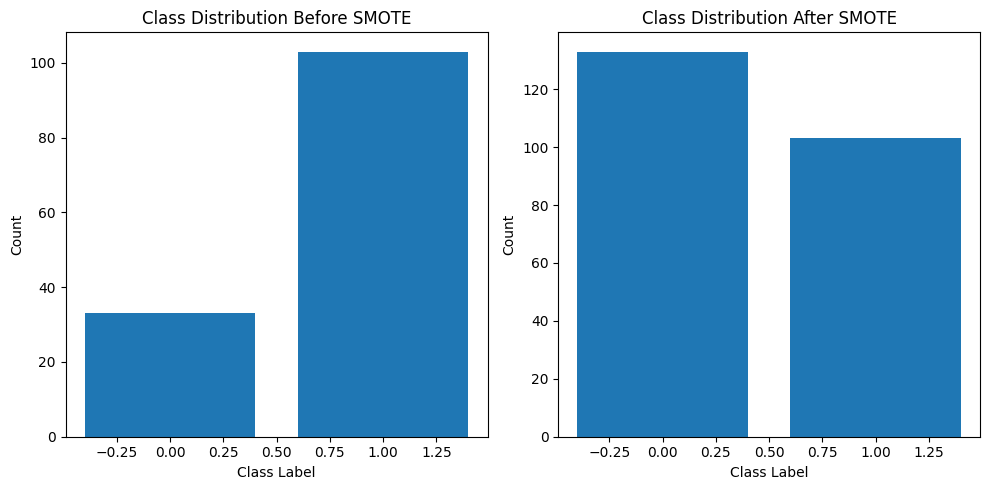

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in the original data
class_counts_before = y_train.value_counts()
minority_target_label = 0
# Create the base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(random_state=42)

# Create the SMOTEBoost classifier
smoteboost_model = SMOTEBoost(
    n_samples=100,
    base_estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    algorithm="SAMME.R",
    random_state=42,
)

# Fit the SMOTEBoost model to the training data with the minority target label
smoteboost_model.fit(X_train, y_train, minority_target=minority_target_label)

# Generate synthetic samples using SMOTE
X_train_synthetic = smoteboost_model.smote.sample(100)

# Combine the original and synthetic samples
X_combined = np.vstack((X_train, X_train_synthetic))
y_combined = np.concatenate((y_train, np.full(len(X_train_synthetic), fill_value=minority_target_label)))

# Count the occurrences of each class after applying SMOTE
class_counts_after = pd.Series(y_combined).value_counts()

# Plot the class distribution before and after SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(class_counts_before.index, class_counts_before.values)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(class_counts_after.index, class_counts_after.values)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


#making balanced dataset

In [ ]:
# Generate synthetic samples using SMOTE
X_train_synthetic = smoteboost_model.smote.sample(100)

# Combine the original and synthetic samples
X_combined = np.vstack((X_train, X_train_synthetic))
y_combined = np.concatenate((y_train, np.full(len(X_train_synthetic), fill_value=minority_target_label)))

# Create a new dataset with a different name
new_X_train = X_combined
new_y_train = y_combined


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have already trained the SMOTEBoost model and obtained the balanced data
# new_X_train and new_y_train are the balanced features and labels, respectively.

# Combine new_X_train and new_y_train into a pandas DataFrame
balanced_data = pd.DataFrame(data=np.hstack((new_X_train, new_y_train.reshape(-1, 1))),
                             columns=[f'feature_{i}' for i in range(new_X_train.shape[1])] + ['target'])

# Save the balanced dataset to a CSV file
balanced_data.to_csv('balanced_dataset.csv', index=False)


In [ ]:
import pandas as pd

# Assuming you have already created new_X_train and new_y_train

# Combine new_X_train and new_y_train into a pandas DataFrame
combined_data = pd.DataFrame(data=np.hstack((new_X_train, new_y_train.reshape(-1, 1))),
                             columns=[f'feature_{i}' for i in range(new_X_train.shape[1])] + ['target'])

# Save the combined dataset to a CSV file
combined_data.to_csv('combined_dataset.csv', index=False)


In [ ]:
# Replace <your_minority_class_label> with the actual label of your minority class
minority_target_label = 0

# Create the base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(random_state=42)

# Create the SMOTEBoost classifier
smoteboost_model = SMOTEBoost(
    n_samples=100,
    k_neighbors=5,
    base_estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    algorithm="SAMME.R",
    random_state=42,
)

# Fit the SMOTEBoost model to the training data with the minority target label
smoteboost_model.fit(X_train, y_train, minority_target=minority_target_label)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SMOTEBoost(base_estimator=DecisionTreeClassifier(random_state=42),
           random_state=42)

In [ ]:
# read dataset
data_new = pd.read_csv("balanced_dataset.csv")
print(data_new.shape)
data_new.head()


(236, 8)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target
0,180.198,201.249,26.738,0.403884,-6.452058,0.212294,0.141929,1.0
1,199.228,209.512,30.940,0.432439,-7.682587,0.173319,0.068501,0.0
2,113.715,116.443,26.547,0.380253,-5.943501,0.192150,0.179677,0.0
3,136.926,159.866,25.703,0.460600,-6.547148,0.152813,0.138512,1.0
4,193.030,208.900,21.934,0.497554,-5.845099,0.278679,0.185668,1.0


In [ ]:
X_un=data_new.drop(['target'],axis=1)
y_un=data_new[['target']]

In [ ]:
y_un.value_counts()

target
0.0       133
1.0       103
dtype: int64

<Axes: ylabel='target'>

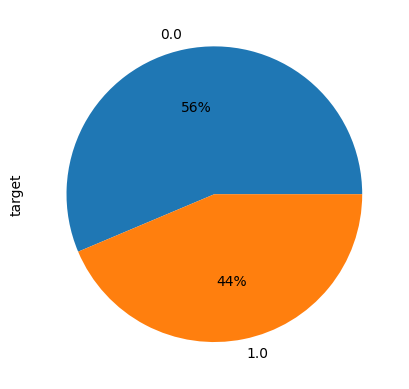

In [ ]:
data_new['target'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=24)

for train_index,test_index in split.split(X_un,y_un):
    strat_train_set_x,strat_train_y=X_un.loc[train_index],y_un.loc[train_index]
    strat_test_set_x,strat_test_y=X_un.loc[test_index],y_un.loc[test_index] #completely unseen to our classifier

In [ ]:
print(strat_train_set_x.shape,strat_train_y.shape)
print(strat_test_set_x.shape,strat_test_y.shape)

(188, 7) (188, 1)
(48, 7) (48, 1)


In [ ]:
#Train the model
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score,recall_score
model=XGBClassifier(use_label_encoder=False,eval_metric='rmse')
model.fit(strat_train_set_x,strat_train_y)
y_pred=model.predict(strat_test_set_x)

print('accuracy score %.2f'% accuracy_score(y_pred,strat_test_y))
print('recall score %.2f'%recall_score(y_pred,strat_test_y))


accuracy score 0.88
recall score 0.89


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import os
for dirname, _, filenames in os.walk('../F:/Thesis Folder/Thesis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
SEED = 42
EPOCHS = 300
BATCH_SIZE = 32
def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

In [ ]:
train_df, test_df = train_test_split(data_new,
                                     test_size=0.2,
                                     random_state=SEED)
train_df, val_df = train_test_split(train_df,
                                    test_size=0.2,
                                    random_state=SEED)


X_train = train_df.drop('target', axis=1).values.astype('float32')
y_train = train_df['target'].values.astype('int32')
X_val = val_df.drop('target', axis=1).values.astype('float32')
y_val = val_df['target'].values.astype('int32')
X_test = test_df.drop('target', axis=1).values.astype('float32')
y_test = test_df['target'].values.astype('int32')

mmsc = MinMaxScaler()
X_train = mmsc.fit_transform(X_train)
X_val = mmsc.transform(X_val)
X_test = mmsc.transform(X_test)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

NameError: ignored

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1024      
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 2)                 130       
                                                                 
Total params: 42,434
Trainable params: 42,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
2/2 [==============================] -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 6ms/step
Precision: 0.2763 - Recall: 0.5000 - F1: 0.3559
5/5 [==============================] - 0s 51ms/step - loss: 0.6889 - accuracy: 0.5467 - val_loss: 0.6864 - val_accuracy: 0.5526
Epoch 3/300
1/5 [=====>........................] - ETA: 0s - loss: 0.6769 - accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 5ms/step
Precision: 0.2763 - Recall: 0.5000 - F1: 0.3559
5/5 [==============================] - 0s 50ms/step - loss: 0.6857 - accuracy: 0.5467 - val_loss: 0.6851 - val_accuracy: 0.5526
Epoch 4/300
1/5 [=====>........................] - ETA: 0s - loss: 0.6928 - accuracy: 0.3750

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 5ms/step
Precision: 0.2763 - Recall: 0.5000 - F1: 0.3559
5/5 [==============================] - 0s 58ms/step - loss: 0.6812 - accuracy: 0.5467 - val_loss: 0.6836 - val_accuracy: 0.5526
Epoch 5/300
1/5 [=====>........................] - ETA: 0s - loss: 0.6766 - accuracy: 0.5938

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 9ms/step
Precision: 0.2763 - Recall: 0.5000 - F1: 0.3559
5/5 [==============================] - 0s 63ms/step - loss: 0.6758 - accuracy: 0.6000 - val_loss: 0.6817 - val_accuracy: 0.5526
Epoch 6/300
1/5 [=====>........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 8ms/step
Precision: 0.2763 - Recall: 0.5000 - F1: 0.3559
5/5 [==============================] - 0s 60ms/step - loss: 0.6690 - accuracy: 0.6200 - val_loss: 0.6794 - val_accuracy: 0.5526
Epoch 7/300
2/2 [==============================] - 0s 4ms/step
Precision: 0.7838 - Recall: 0.5294 - F1: 0.4176
5/5 [==============================] - 0s 40ms/step - loss: 0.6615 - accuracy: 0.6400 - val_loss: 0.6766 - val_accuracy: 0.5789
Epoch 8/300
1/5 [=====>........................] - ETA: 0s - loss: 0.6655 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 6ms/step
Precision: 0.8000 - Recall: 0.5882 - F1: 0.5250
5/5 [==============================] - 0s 51ms/step - loss: 0.6523 - accuracy: 0.7000 - val_loss: 0.6736 - val_accuracy: 0.6316
Epoch 9/300
2/2 [==============================] - 0s 5ms/step
Precision: 0.8000 - Recall: 0.5882 - F1: 0.5250
5/5 [==============================] - 0s 40ms/step - loss: 0.6425 - accuracy: 0.7333 - val_loss: 0.6709 - val_accuracy: 0.6316
Epoch 10/300
2/2 [==============================] - 0s 7ms/step
Precision: 0.8088 - Recall: 0.6176 - F1: 0.5723
5/5 [==============================] - 0s 34ms/step - loss: 0.6305 - accuracy: 0.7533 - val_loss: 0.6684 - val_accuracy: 0.6579
Epoch 11/300
2/2 [==============================] - 0s 7ms/step
Precision: 0.8281 - Recall: 0.6765 - F1: 0.6571
5/5 [==============================] - 0s 39ms/step - loss: 0.6178 - accuracy: 0.7533 - val_loss: 0.6658 - val_accuracy: 0.7105
Epoch 12/300
2/2 [==============================] - 0s

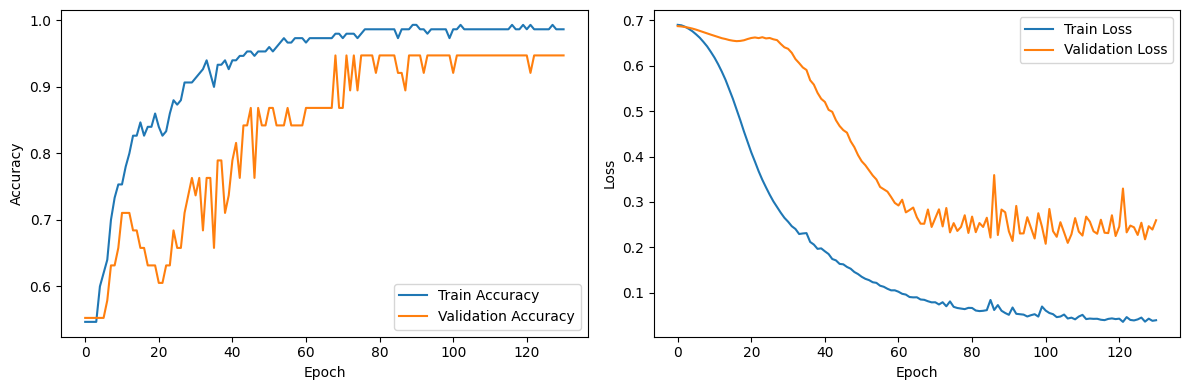

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import tensorflow_addons as tfa
from sklearn.metrics import precision_score, recall_score, f1_score

class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(MetricsCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        val_predictions = np.argmax(self.model.predict(self.validation_data[0]), axis=-1)
        val_targets = np.argmax(self.validation_data[1], axis=-1)

        precision = precision_score(val_targets, val_predictions, average='macro')
        recall = recall_score(val_targets, val_predictions, average='macro')
        f1 = f1_score(val_targets, val_predictions, average='macro')

        print(f'Precision: {precision:.4f} - Recall: {recall:.4f} - F1: {f1:.4f}')

shape = X_train.shape[1]
num_classes = y_train.shape[1]

model = Sequential()
model.add(Input((shape,)))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
opt = tfa.optimizers.RectifiedAdam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1, restore_best_weights=True)
metrics_callback = MetricsCallback(validation_data=(X_val, y_val))

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_val, y_val), callbacks=[es_callback, metrics_callback])

 #Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


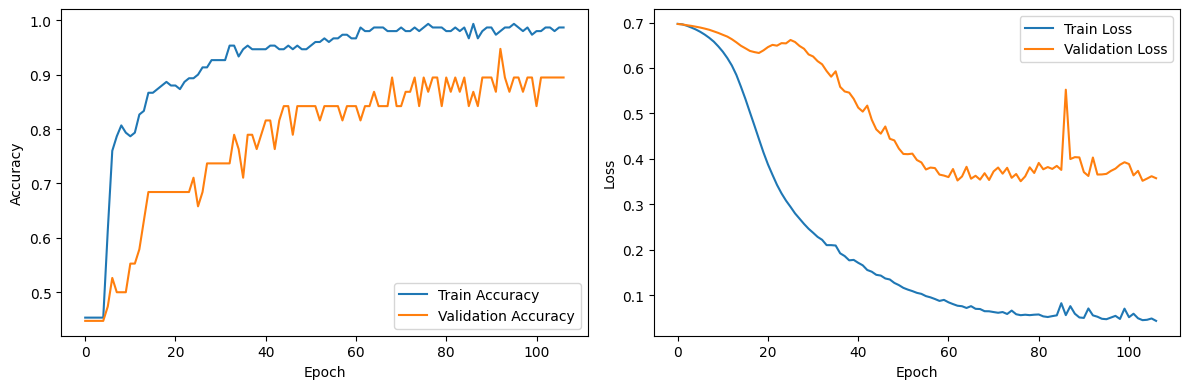

# Without SMOTE

In [ ]:
reduced_dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),HNR,RPDE,spread1,spread2,PPE
0,119.992,157.302,21.033,0.414783,-4.813031,0.266482,0.284654
1,122.400,148.650,19.085,0.458359,-4.075192,0.335590,0.368674
2,116.682,131.111,20.651,0.429895,-4.443179,0.311173,0.332634
3,116.676,137.871,20.644,0.434969,-4.117501,0.334147,0.368975
4,116.014,141.781,19.649,0.417356,-3.747787,0.234513,0.410335
...,...,...,...,...,...,...,...
190,174.188,230.978,19.517,0.448439,-6.538586,0.121952,0.133050
191,209.516,253.017,19.147,0.431674,-6.195325,0.129303,0.168895
192,174.688,240.005,17.883,0.407567,-6.787197,0.158453,0.131728
193,198.764,396.961,19.020,0.451221,-6.744577,0.207454,0.123306


#ANN model

In [ ]:
SEED = 42
EPOCHS = 300
BATCH_SIZE = 32
def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

In [ ]:


train_df, test_df = train_test_split(reduced_dataset,
                                     test_size=0.2,
                                     random_state=SEED)
train_df, val_df = train_test_split(train_df,
                                    test_size=0.2,
                                    random_state=SEED)


X_train = train_df.drop('status', axis=1).values.astype('float32')
y_train = train_df['status'].values.astype('int32')
X_val = val_df.drop('status', axis=1).values.astype('float32')
y_val = val_df['status'].values.astype('int32')
X_test = test_df.drop('status', axis=1).values.astype('float32')
y_test = test_df['status'].values.astype('int32')

mmsc = MinMaxScaler()
X_train = mmsc.fit_transform(X_train)
X_val = mmsc.transform(X_val)
X_test = mmsc.transform(X_test)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               1024      
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 2)                 130       
                                                                 
Total params: 42,434
Trainable params: 42,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1/1 [==============================] -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 25ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 36ms/step - loss: 0.6375 - accuracy: 0.7419 - val_loss: 0.6429 - val_accuracy: 0.7188
Epoch 4/300
1/1 [==============================] - 0s 26ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 34ms/step - loss: 0.6292 - accuracy: 0.7419 - val_loss: 0.6359 - val_accuracy: 0.7188
Epoch 5/300
1/4 [======>.......................] - ETA: 0s - loss: 0.6472 - accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 40ms/step - loss: 0.6205 - accuracy: 0.7419 - val_loss: 0.6277 - val_accuracy: 0.7188
Epoch 6/300
1/1 [==============================] - 0s 18ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 39ms/step - loss: 0.6109 - accuracy: 0.7419 - val_loss: 0.6191 - val_accuracy: 0.7188
Epoch 7/300
1/4 [======>.......................] - ETA: 0s - loss: 0.5716 - accuracy: 0.8438

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 36ms/step - loss: 0.6010 - accuracy: 0.7419 - val_loss: 0.6102 - val_accuracy: 0.7188
Epoch 8/300
1/1 [==============================] - 0s 23ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 43ms/step - loss: 0.5888 - accuracy: 0.7419 - val_loss: 0.6013 - val_accuracy: 0.7188
Epoch 9/300
1/4 [======>.......................] - ETA: 0s - loss: 0.6003 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 16ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 37ms/step - loss: 0.5782 - accuracy: 0.7419 - val_loss: 0.5918 - val_accuracy: 0.7188
Epoch 10/300
1/1 [==============================] - 0s 14ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 26ms/step - loss: 0.5667 - accuracy: 0.7419 - val_loss: 0.5823 - val_accuracy: 0.7188
Epoch 11/300
1/1 [==============================] - 0s 14ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 25ms/step - loss: 0.5547 - accuracy: 0.7419 - val_loss: 0.5729 - val_accuracy: 0.7188
Epoch 12/300
1/4 [======>.......................] - ETA: 0s - loss: 0.5080 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 18ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 27ms/step - loss: 0.5431 - accuracy: 0.7419 - val_loss: 0.5637 - val_accuracy: 0.7188
Epoch 13/300
1/1 [==============================] - 0s 15ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 30ms/step - loss: 0.5326 - accuracy: 0.7419 - val_loss: 0.5546 - val_accuracy: 0.7188
Epoch 14/300
1/1 [==============================] - 0s 15ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 26ms/step - loss: 0.5220 - accuracy: 0.7419 - val_loss: 0.5460 - val_accuracy: 0.7188
Epoch 15/300
1/4 [======>.......................] - ETA: 0s - loss: 0.5099 - accuracy: 0.7500

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 15ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 28ms/step - loss: 0.5095 - accuracy: 0.7419 - val_loss: 0.5376 - val_accuracy: 0.7188
Epoch 16/300
1/1 [==============================] - 0s 15ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 28ms/step - loss: 0.4983 - accuracy: 0.7419 - val_loss: 0.5290 - val_accuracy: 0.7188
Epoch 17/300
1/1 [==============================] - 0s 16ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 29ms/step - loss: 0.4881 - accuracy: 0.7419 - val_loss: 0.5200 - val_accuracy: 0.7188
Epoch 18/300
1/4 [======>.......................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 16ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 29ms/step - loss: 0.4785 - accuracy: 0.7419 - val_loss: 0.5109 - val_accuracy: 0.7188
Epoch 19/300
1/1 [==============================] - 0s 14ms/step
Precision: 0.3594 - Recall: 0.5000 - F1: 0.4182
4/4 [==============================] - 0s 26ms/step - loss: 0.4665 - accuracy: 0.7419 - val_loss: 0.5011 - val_accuracy: 0.7188
Epoch 20/300
1/1 [==============================] - 0s 14ms/step
Precision: 0.8710 - Recall: 0.5556 - F1: 0.5259
4/4 [==============================] - 0s 26ms/step - loss: 0.4554 - accuracy: 0.7500 - val_loss: 0.4906 - val_accuracy: 0.7500
Epoch 21/300
1/4 [======>.......................] - ETA: 0s - loss: 0.3909 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 14ms/step
Precision: 0.8710 - Recall: 0.5556 - F1: 0.5259
4/4 [==============================] - 0s 26ms/step - loss: 0.4432 - accuracy: 0.7742 - val_loss: 0.4803 - val_accuracy: 0.7500
Epoch 22/300
1/1 [==============================] - 0s 14ms/step
Precision: 0.8966 - Recall: 0.6667 - F1: 0.6923
4/4 [==============================] - 0s 25ms/step - loss: 0.4310 - accuracy: 0.8065 - val_loss: 0.4694 - val_accuracy: 0.8125
Epoch 23/300
1/1 [==============================] - 0s 22ms/step
Precision: 0.9107 - Recall: 0.7222 - F1: 0.7587
4/4 [==============================] - 0s 31ms/step - loss: 0.4181 - accuracy: 0.8306 - val_loss: 0.4589 - val_accuracy: 0.8438
Epoch 24/300
1/1 [==============================] - 0s 15ms/step
Precision: 0.9107 - Recall: 0.7222 - F1: 0.7587
4/4 [==============================] - 0s 26ms/step - loss: 0.4064 - accuracy: 0.8468 - val_loss: 0.4473 - val_accuracy: 0.8438
Epoch 25/300
1/1 [==============================]

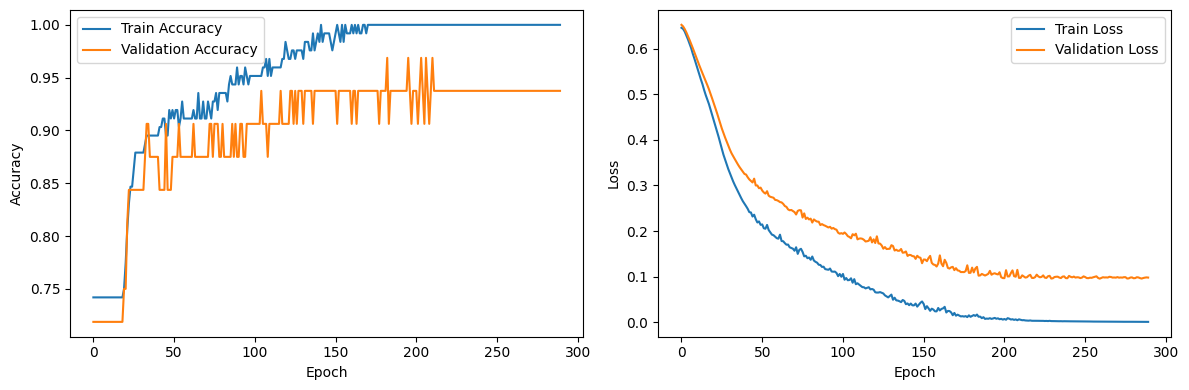

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import tensorflow_addons as tfa
from sklearn.metrics import precision_score, recall_score, f1_score

class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(MetricsCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        val_predictions = np.argmax(self.model.predict(self.validation_data[0]), axis=-1)
        val_targets = np.argmax(self.validation_data[1], axis=-1)

        precision = precision_score(val_targets, val_predictions, average='macro')
        recall = recall_score(val_targets, val_predictions, average='macro')
        f1 = f1_score(val_targets, val_predictions, average='macro')

        print(f'Precision: {precision:.4f} - Recall: {recall:.4f} - F1: {f1:.4f}')

shape = X_train.shape[1]
num_classes = y_train.shape[1]

model = Sequential()
model.add(Input((shape,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
opt = tfa.optimizers.RectifiedAdam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1, restore_best_weights=True)
metrics_callback = MetricsCallback(validation_data=(X_val, y_val))

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_val, y_val), callbacks=[es_callback, metrics_callback])

 #Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#Log-reg

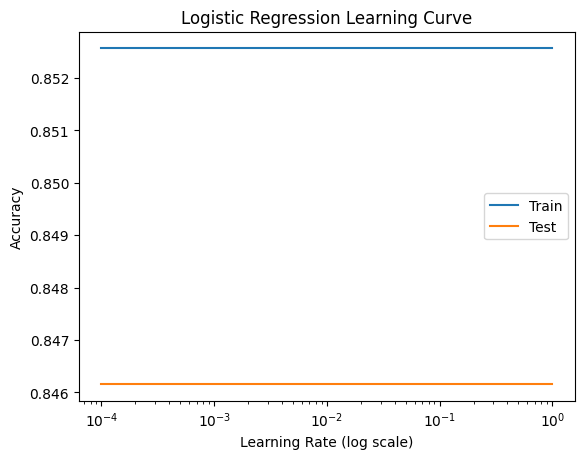

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data


# create lists to store results
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
train_accuracy = []
test_accuracy = []

# iterate over different learning rates
for lr in learning_rates:
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(reduced_dataset, y, test_size=0.2, random_state=40)

    # create logistic regression model with current learning rate
    model = LogisticRegression(C=1/lr, max_iter=1000, penalty='l1', solver='liblinear')

    # fit the model on the training data
    model.fit(X_train, y_train)

    # evaluate the accuracy on the training data
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)

    # evaluate the accuracy on the testing data
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc)

# plot the learning curves
plt.plot(learning_rates, train_accuracy, label='Train')
plt.plot(learning_rates, test_accuracy, label='Test')
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Learning Curve')
plt.legend()
plt.show()


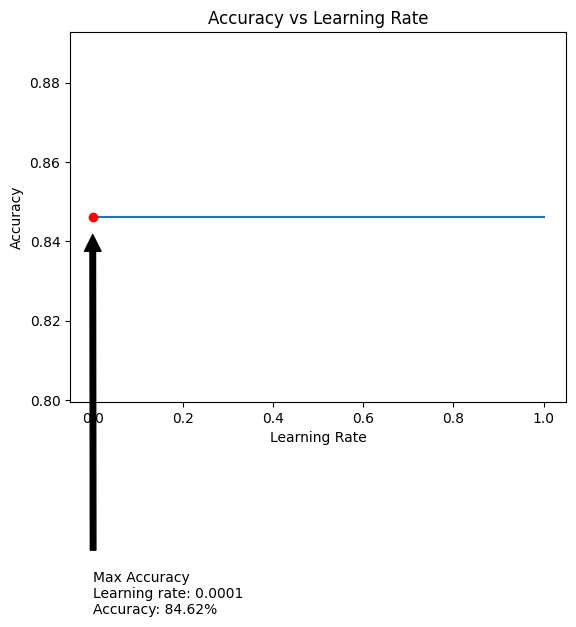

In [ ]:
import numpy as np
accuracy_scores = test_accuracy
max_idx = np.argmax(accuracy_scores)
plt.plot(learning_rates, accuracy_scores)
plt.plot(learning_rates[max_idx], accuracy_scores[max_idx], 'ro')
plt.annotate('Max Accuracy\nLearning rate: {}\nAccuracy: {:.2f}%'.format(learning_rates[max_idx], accuracy_scores[max_idx]*100),
             xy=(learning_rates[max_idx], accuracy_scores[max_idx]),
             xytext=(learning_rates[max_idx]+0.001, accuracy_scores[max_idx]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate')
plt.show()


In [ ]:
import scipy as sp
trials = 20
#pmf = [sp.stats.binom.pmf(x, trials, .5)

for x in range(trials + 1):
    print(f"PMF for {x} successes: {pmf[x]}")


PMF for 0 successes: 9.5367431640625e-07
PMF for 1 successes: 1.9073486328124993e-05
PMF for 2 successes: 0.00018119812011718736
PMF for 3 successes: 0.0010871887207031228
PMF for 4 successes: 0.004620552062988283
PMF for 5 successes: 0.014785766601562497
PMF for 6 successes: 0.03696441650390628
PMF for 7 successes: 0.07392883300781249
PMF for 8 successes: 0.1201343536376954
PMF for 9 successes: 0.1601791381835938
PMF for 10 successes: 0.17619705200195296
PMF for 11 successes: 0.1601791381835938
PMF for 12 successes: 0.12013435363769538
PMF for 13 successes: 0.07392883300781249
PMF for 14 successes: 0.03696441650390628
PMF for 15 successes: 0.014785766601562497
PMF for 16 successes: 0.004620552062988283
PMF for 17 successes: 0.0010871887207031228
PMF for 18 successes: 0.00018119812011718736
PMF for 19 successes: 1.9073486328124986e-05
PMF for 20 successes: 9.5367431640625e-07


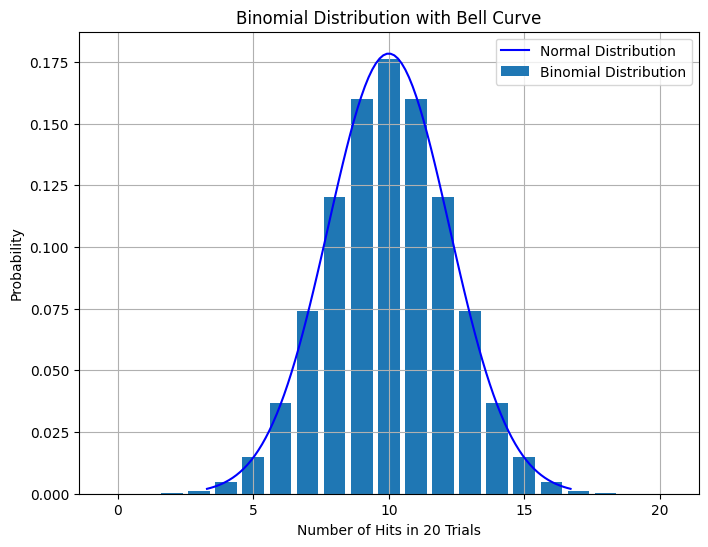

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

trials = 20
hits = np.arange(trials + 1)  # Number of hits in 20 trials
pmf = binom.pmf(hits, trials, 0.5)  # PMF of binomial distribution

# Calculate mean and standard deviation of the binomial distribution
mean = trials * 0.5
std = np.sqrt(trials * 0.5 * 0.5)

# Generate x-values for the bell curve
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)

# Calculate y-values for the bell curve
y = norm.pdf(x, mean, std)

# Plot the bell curve
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', label='Normal Distribution')

# Plot the binomial distribution
plt.bar(hits, pmf, label='Binomial Distribution')

plt.xlabel('Number of Hits in 20 Trials')
plt.ylabel('Probability')
plt.title('Binomial Distribution with Bell Curve')
plt.grid(True)

plt.legend()
plt.show()


#MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Select the Boruta-selected features
selected_features = X[boruta_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# Scale the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an MLP classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)

# Train the MLP classifier
mlp_clf.fit(X_train_scaled, y_train)

# Predict the classes for the test set
y_pred = mlp_clf.predict(X_test_scaled)

# Evaluate the performance of the MLP classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8974358974358975
Precision: 0.9117647058823529
Recall: 0.96875
F1-score: 0.9393939393939394


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#ML Tools

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

# All Machine learning models on Original Dataset

In [ ]:
#selected_features = X[boruta_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X.shape)

(195, 22)


In [ ]:
score3 = acc_score(X,y)
score3

,Classifier,Accuracy
0,RandomForest,0.918367
1,Logistic,0.897959
2,GradientBoosting,0.897959
3,LinearSVM,0.877551
4,AdaBoost,0.877551
5,DecisionTree,0.877551
6,RadialSVM,0.836735
7,KNeighbors,0.836735


In [ ]:
selected_features = X[boruta_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# Scale the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(selected_features)
no_samples,no_features = selected_features.shape
print("Number of Features: ",no_features)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)     HNR      RPDE   spread1   spread2       PPE
0        119.992       157.302  21.033  0.414783 -4.813031  0.266482  0.284654
1        122.400       148.650  19.085  0.458359 -4.075192  0.335590  0.368674
2        116.682       131.111  20.651  0.429895 -4.443179  0.311173  0.332634
3        116.676       137.871  20.644  0.434969 -4.117501  0.334147  0.368975
4        116.014       141.781  19.649  0.417356 -3.747787  0.234513  0.410335
..           ...           ...     ...       ...       ...       ...       ...
190      174.188       230.978  19.517  0.448439 -6.538586  0.121952  0.133050
191      209.516       253.017  19.147  0.431674 -6.195325  0.129303  0.168895
192      174.688       240.005  17.883  0.407567 -6.787197  0.158453  0.131728
193      198.764       396.961  19.020  0.451221 -6.744577  0.207454  0.123306
194      214.289       260.277  21.209  0.462803 -5.724056  0.190667  0.148569

[195 rows x 7 columns]
Number of Features:  7


In [ ]:
score3 = acc_score(selected_features,y)
score3

,Classifier,Accuracy
0,RandomForest,0.938776
1,LinearSVM,0.918367
2,Logistic,0.897959
3,DecisionTree,0.897959
4,KNeighbors,0.897959
5,GradientBoosting,0.897959
6,RadialSVM,0.857143
7,AdaBoost,0.857143
